In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from gurobipy import *
#from scipy.spatial import ConvexHull
#from shapely.geometry import Polygon, Point
from numpy import random
import time
import pandas as pd
from itertools import zip_longest   # zip 함수 길이 다를 경우

In [26]:
# 행정동 나중에 바꾸기
입지후보지 = pd.read_csv('입지선정후보군_좌표추가.csv', encoding='EUC-KR')
입지후보지 = 입지후보지[입지후보지['행정동'] == '석관동']

버스 = pd.read_csv('서울시_버스정류장_행정동추가.csv')
버스 = 버스[버스['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                 '월계3동','월계1동','장위1동','장위2동','장위3동'])]

지하철 = pd.read_csv('서울시_지하철역_행정동추가.csv', encoding='EUC-KR', index_col=0)
지하철 = 지하철[지하철['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                       '월계3동','월계1동','장위1동','장위2동','장위3동'])]

주차장 = pd.read_csv('서울시_주차장_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
주차장 = 주차장[주차장['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                       '월계3동','월계1동','장위1동','장위2동','장위3동'])]

주택 = pd.read_csv('서울시주택_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
주택 = 주택[주택['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                 '월계3동','월계1동','장위1동','장위2동','장위3동'])]

In [27]:
# # 석관동
# 입지후보지 = pd.read_csv('입지선정후보군_좌표추가.csv', encoding='EUC-KR')
# 입지후보지 = 입지후보지[입지후보지['행정동'] == '석관동']
# print(입지후보지.shape)
# 입지후보지.head(2)

In [28]:
# 버스 = pd.read_csv('서울시_버스정류장_행정동추가.csv')
# 버스 = 버스[버스['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
#                                  '월계3동','월계1동','장위1동','장위2동','장위3동'])]
# print(버스.shape)
# 버스.head(2)

In [29]:
# 지하철 = pd.read_csv('서울시_지하철역_행정동추가.csv', encoding='EUC-KR', index_col=0)
# 지하철 = 지하철[지하철['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
#                                        '월계3동','월계1동','장위1동','장위2동','장위3동'])]
# print(지하철.shape)
# 지하철.head(2)

In [30]:
# 주차장 = pd.read_csv('서울시_주차장_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
# 주차장 = 주차장[주차장['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
#                                        '월계3동','월계1동','장위1동','장위2동','장위3동'])]
# print(주차장.shape)
# 주차장.head(2)

In [31]:
# 주택 = pd.read_csv('서울시주택_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
# 주택 = 주택[주택['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
#                                  '월계3동','월계1동','장위1동','장위2동','장위3동'])]
# print(주택.shape)
# 주택.head(2)

In [32]:
버스_points = np.array([list(i) for i in zip(버스['X좌표'], 버스['Y좌표'])])
print(버스_points.shape)
버스_points[:2]

(197, 2)


array([[127.06723071,  37.61506526],
       [127.069914  ,  37.61825517]])

In [33]:
지하철_points = np.array([list(i) for i in zip(지하철['경도'], 지하철['위도'])])
print(지하철_points.shape)
지하철_points[:2]

(12, 2)


array([[127.04118477,  37.60142105],
       [127.04832662,  37.60626414]])

In [34]:
주차장_points = np.array([list(i) for i in zip(주차장['경도'], 주차장['위도'])])
print(주차장_points.shape)
주차장_points[:2]

(27, 2)


array([[127.05578514,  37.59150199],
       [127.05595939,  37.59134243]])

In [35]:
주택_points = np.array([list(i) for i in zip(주택['위도'], 주택['경도'])])   # 위도 경도 바뀜
print(주택_points.shape)
주택_points[:2]

(18, 2)


array([[127.06985478,  37.62958967],
       [127.05966412,  37.62924721]])

In [36]:
X = list(버스['X좌표']) + list(지하철['경도']) + list(주차장['경도']) + list(주택['위도'])     # 주택 위도 경도 이름 바뀜
X[:2]

[127.06723070700001, 127.0699139994]

In [37]:
Y = list(버스['Y좌표']) + list(지하철['위도']) + list(주차장['위도']) + list(주택['경도'])
Y[:2]

[37.6150652627, 37.6182551734]

In [38]:
points = np.array([list(i) for i in zip(X, Y)])
print(points.shape)
points[:2]

(254, 2)


array([[127.06723071,  37.61506526],
       [127.069914  ,  37.61825517]])

In [39]:
# # 보유하고 있는 좌표(points)의 모양에 맞는 도형 생성
# # 해당 도형 안에 포함되는 random한 좌표 생성 (임의의 노인놀이터 위치 좌표)
# def generate_candidate_sites(points, M=100):
#     '''
#     Generate M candidate sites with the convex hull of a point set
#     Input:
#         points: 버스정류장, 지하철역 위치 좌표 등 (기타 인근에 있으면 좋은 시설 좌표)
#         M: 생성할 random 좌표 수 (임의의 노인놀이터 수)
#     Return:
#         sites: a Numpy array with shape of (M,2)
#     '''
#     hull = ConvexHull(points)                                   # points 좌표들의 외곽선 생성
#     polygon_points = points[hull.vertices]                      # 외곽선을 구성하는 직선 간 점(좌표) 반환
#     poly = Polygon(polygon_points)                              # 외곽선 모양의 도형 생성
#     min_x, min_y, max_x, max_y = poly.bounds                    # 도형의 x축과 y축 좌표 최소,최대
#     sites = []
#     while len(sites) < M:
#         random_point = Point([random.uniform(min_x, max_x),     # x축 범위 내 random한 값
#                               random.uniform(min_y, max_y)])    # y축 범위 내 random한 값
#         if (random_point.within(poly)):                         # random한 좌표가 도형 안에 있다면 sites에 추가
#             sites.append(random_point)
#     return np.array([(p.x,p.y) for p in sites])

In [ ]:
df =

In [ ]:
# 행정동별 가중치 계산
버스: 정류장 개수
지하철

In [40]:
def mclp(버스_points, 지하철_points, 주차장_points, 주택_points, points, K, radius):
    """
    Solve maximum covering location problem
    Input:
        points: 버스정류장, 지하철역 위치 좌표 등 (기타 인근에 있으면 좋은 시설 좌표)
        K: 배치할 노인놀이터의 수
        radius: 반경 (노인들이 이동하기 적합한 거리)
        M: generate_candidate_sites 함수에서 생성할 random 좌표 수 (임의의 노인놀이터 수)
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)

    start = time.time()
    sites = np.array([list(i) for i in zip(입지후보지['x좌표'], 입지후보지['y좌표'])])
    J = sites.shape[0]                                         # 후보지 수
    
    # 수요지점 수
    A = 버스_points.shape[0]
    B = 지하철_points.shape[0]
    C = 주차장_points.shape[0]
    D = 주택_points.shape[0]
    
    # 후보지와 수요지점 간 거리 계산
    D1 = distance_matrix(버스_points, sites)
    D2 = distance_matrix(지하철_points, sites)
    D3 = distance_matrix(주차장_points, sites)
    D4 = distance_matrix(주택_points, sites)
    
    for i in [D1, D2, D3, D4]:
        mask1 = i<=radius
        i[mask1]=1                                                 # 반경 내 속하면 1, 아니면 0
        i[~mask1]=0

    m = Model()
    x1, x2, x3, x4 = {}, {}, {}, {}
    y = {}
    
    # 수요지점 변수 추가
    for i in range(A):                                       
        x1[i] = m.addVar(vtype=GRB.BINARY, name="x1%d" % i)
    for i in range(B):                                       
        x2[i] = m.addVar(vtype=GRB.BINARY, name="x2%d" % i)
    for i in range(C):                                       
        x3[i] = m.addVar(vtype=GRB.BINARY, name="x3%d" % i)
    for i in range(D):                                       
        x4[i] = m.addVar(vtype=GRB.BINARY, name="x4%d" % i)
    
    for j in range(J):
        y[j] = m.addVar(vtype=GRB.BINARY, name="y%d" % j)     # 후보지 변수 추가

    m.update()
    m.addConstr(quicksum(y[j] for j in range(J)) == K)        # 후보지 제약 조건 (3개)

    # 수요지점 제약 조건
    for i in range(A): 
        m.addConstr(quicksum(y[j] for j in np.where(D1[i]==1)[0]) >= x1[i])
    for i in range(B): 
        m.addConstr(quicksum(y[j] for j in np.where(D2[i]==1)[0]) >= x2[i])
    for i in range(C): 
        m.addConstr(quicksum(y[j] for j in np.where(D3[i]==1)[0]) >= x3[i])
    for i in range(D): 
        m.addConstr(quicksum(y[j] for j in np.where(D4[i]==1)[0]) >= x4[i])

    # 목적함수 수정
    m.setObjective(quicksum(0*x1[a] + 2*x2[b] + 0*x3[c] + 0*x4[d] \
                            for a,b,c,d in zip_longest(range(A),range(B),range(C),range(D), fillvalue=0)),\
                   GRB.MAXIMIZE)   # 제약조건 포함, 모든 수요지점 더하기
    
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)
    
    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            # print v.varName,v.x
            if v.x==1 and v.varName[0]=="y":
                solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal

In [41]:
# def mclp(버스_points, 지하철_points, 주차장_points, 주택_points, points, K, radius):
#     """
#     Solve maximum covering location problem
#     Input:
#         points: 버스정류장, 지하철역 위치 좌표 등 (기타 인근에 있으면 좋은 시설 좌표)
#         K: 배치할 노인놀이터의 수
#         radius: 반경 (노인들이 이동하기 적합한 거리)
#         M: generate_candidate_sites 함수에서 생성할 random 좌표 수 (임의의 노인놀이터 수)
#         the ConvexHull wrapped by the polygon
#     Return:
#         opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
#         f: the optimal value of the objective function
#     """
#     print('  Number of points %g' % points.shape[0])
#     print('  K %g' % K)
#     print('  Radius %g' % radius)

#     start = time.time()
#     sites = np.array([list(i) for i in zip(입지후보지['x좌표'], 입지후보지['y좌표'])])
#     J = sites.shape[0]                                         # 후보지 수
    
#     # 수요지점 수
#     A = 버스_points.shape[0]
#     B = 지하철_points.shape[0]
#     C = 주차장_points.shape[0]
#     D = 주택_points.shape[0]
    
#     # 후보지와 수요지점 간 거리 계산
# #     D1 = distance_matrix(버스_points, sites)
# #     D2 = distance_matrix(지하철_points, sites)
# #     D3 = distance_matrix(주차장_points, sites)
# #     D4 = distance_matrix(주택_points, sites)
#     dist1 = sklearn.neighbors.DistanceMetric.get_metric('haversine')
#     D1 = (dist1.pairwise
#         (sites,
#          버스_points)*3959
#     )
# #     D1 = (
# #         pd.DataFrame(dist_matrix1, index=입지후보지['시설명'], 
# #                  columns=버스['정류소명'])
# #     )

#     dist2 = sklearn.neighbors.DistanceMetric.get_metric('haversine')
#     D2 = (dist2.pairwise
#         (sites,
#          지하철_points)*3959
#     )
# #     D2 = (
# #         pd.DataFrame(dist_matrix2, index=입지후보지['시설명'], 
# #                  columns=지하철['전철역명'])
# #     )

#     dist3 = sklearn.neighbors.DistanceMetric.get_metric('haversine')
#     D3 = (dist3.pairwise
#         (sites,
#          주차장_points)*3959
#     )
# #     D3 = (
# #         pd.DataFrame(dist_matrix3, index=입지후보지['시설명'], 
# #                  columns=주차장['주차장이름'])
# #     )

#     dist4 = sklearn.neighbors.DistanceMetric.get_metric('haversine')
#     D4 = (dist4.pairwise
#         (sites,
#          주택_points)*3959
#     )
# #     D4 = (
# #         pd.DataFrame(dist_matrix4, index=입지후보지['시설명'], 
# #                  columns=주택['단지명'])
# #     )
    
    
#     for i in [D1, D2, D3, D4]:
#         mask1 = i<=radius
#         i[mask1]=1                                                 # 반경 내 속하면 1, 아니면 0
#         i[~mask1]=0


#     m = Model()
#     x1, x2, x3, x4 = {}, {}, {}, {}
#     y = {}
    
#     # 수요지점 변수 추가
#     for i in range(A):                                       
#         x1[i] = m.addVar(vtype=GRB.BINARY, name="x1%d" % i)
#     for i in range(B):                                       
#         x2[i] = m.addVar(vtype=GRB.BINARY, name="x2%d" % i)
#     for i in range(C):                                       
#         x3[i] = m.addVar(vtype=GRB.BINARY, name="x3%d" % i)
#     for i in range(D):                                       
#         x4[i] = m.addVar(vtype=GRB.BINARY, name="x4%d" % i)
    
#     for j in range(J):
#         y[j] = m.addVar(vtype=GRB.BINARY, name="y%d" % j)     # 후보지 변수 추가

#     m.update()
#     m.addConstr(quicksum(y[j] for j in range(J)) == K)        # 후보지 제약 조건 (3개)

# #     # 수요지점 제약 조건
# #     for i in range(A): 
# #         m.addConstr(quicksum(y[j] for j in np.where(D1[i]==1)[0]) >= x1[i])
# #     for i in range(B): 
# #         m.addConstr(quicksum(y[j] for j in np.where(D2[i]==1)[0]) >= x2[i])
# #     for i in range(C): 
# #         m.addConstr(quicksum(y[j] for j in np.where(D3[i]==1)[0]) >= x3[i])
# #     for i in range(D): 
# #         m.addConstr(quicksum(y[j] for j in np.where(D4[i]==1)[0]) >= x4[i])

#     # 목적함수 수정
#     m.setObjective(quicksum(0*x1[a] + 2*x2[b] + 0*x3[c] + 0*x4[d] \
#                             for a,b,c,d in zip_longest(range(A),range(B),range(C),range(D), fillvalue=0)),\
#                    GRB.MAXIMIZE)   # 제약조건 포함, 모든 수요지점 더하기
    
#     m.setParam('OutputFlag', 0)
#     m.optimize()
#     end = time.time()
#     print('----- Output -----')
#     print('  Running time : %s seconds' % float(end-start))
#     print('  Optimal coverage points: %g' % m.objVal)
  
#     solution = []
#     if m.status == GRB.Status.OPTIMAL:
#         for v in m.getVars():
#             # print v.varName,v.x
#             if v.x==1 and v.varName[0]=="y":
#                 solution.append(int(v.varName[1:]))
#     opt_sites = sites[solution]
#     return opt_sites,m.objVal

In [42]:
opts_sites, mobjVal = mclp(버스_points, 지하철_points, 주차장_points, 주택_points, points, 3, 0.0028)
opts_sites

  Number of points 254
  K 3
  Radius 0.0028
----- Output -----
  Running time : 0.017952680587768555 seconds
  Optimal coverage points: 4


array([[127.06414 ,  37.614111],
       [127.063579,  37.614357],
       [127.064186,  37.614016]])

In [43]:
def plot_input(points):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

In [44]:
def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)

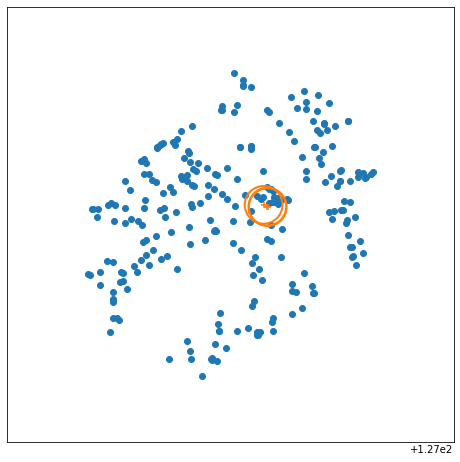

In [46]:
plot_result(points, opts_sites, 0.0028)

In [28]:
수요지점 = pd.DataFrame(points, columns=['경도','위도'])
수요지점.to_csv('석관동_수요지점.csv', index=False, encoding='cp949')

In [27]:
후보지 = pd.DataFrame(opts_sites, columns=['경도','위도'])
후보지.to_csv('석관동_후보지.csv', index=False, encoding='cp949')

In [33]:
from haversine import haversine

In [35]:
# 위경도 입력
후보지 = (127.06414, 37.614111)  #Latitude, Longitude
수요지점 = (127.064415, 37.614512) 

# 거리 계산
haversine(후보지, 수요지점, unit = 'km')

0.04070979017782684

In [18]:
0.0028*111

0.3108